In [28]:
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [29]:
data=pd.read_csv("https://raw.githubusercontent.com/words-sdsc/coursera/master/big-data-4/daily_weather.csv")

In [30]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [31]:

data.head(20)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [32]:
data.shape

(1095, 11)

In [33]:
data.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


In [34]:
data[data.isnull().any(axis=1)].head

<bound method NDFrame.head of       number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
16        16        917.890000           NaN              169.200000   
111      111        915.290000     58.820000              182.600000   
177      177        915.900000           NaN              183.300000   
262      262        923.596607     58.380598               47.737753   
277      277        920.480000     62.600000              194.400000   
334      334        916.230000     75.740000              149.100000   
358      358        917.440000     58.514000               55.100000   
361      361        920.444946     65.801845               49.823346   
381      381        918.480000     66.542000               90.900000   
409      409               NaN     67.853833               65.880616   
517      517        920.570000     53.600000              100.100000   
519      519        916.250000     55.670000              176.400000   
546      546               NaN    

In [35]:
del data['number']

In [36]:
data=data.dropna()

In [37]:
data.shape

(1064, 10)

In [38]:
data.head(5)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [39]:
clean_data = data.copy()
humidity_level=58
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > humidity_level)*1
clean_data['high_humidity_label'].head()
clean_data.head(5)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [40]:
y=clean_data[['high_humidity_label']].copy()
y.head(15)

,high_humidity_label
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,0
9,1


In [41]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [42]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [43]:
X = clean_data[morning_features].copy()

In [44]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [45]:
X.head(5)

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0


In [46]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [48]:
humidity_classifier=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,random_state=0)
humidity_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [49]:
y_predicted=humidity_classifier.predict(X_test)

In [50]:
print("accuracy:-",accuracy_score(y_test,y_predicted)*100)
y_pred = cross_val_predict(estimator=humidity_classifier, X=X, y=y, cv=4)
conf_mat = confusion_matrix(y,y_pred)
print(conf_mat)

accuracy:- 92.04545454545455
[[813  63]
 [ 50 138]]


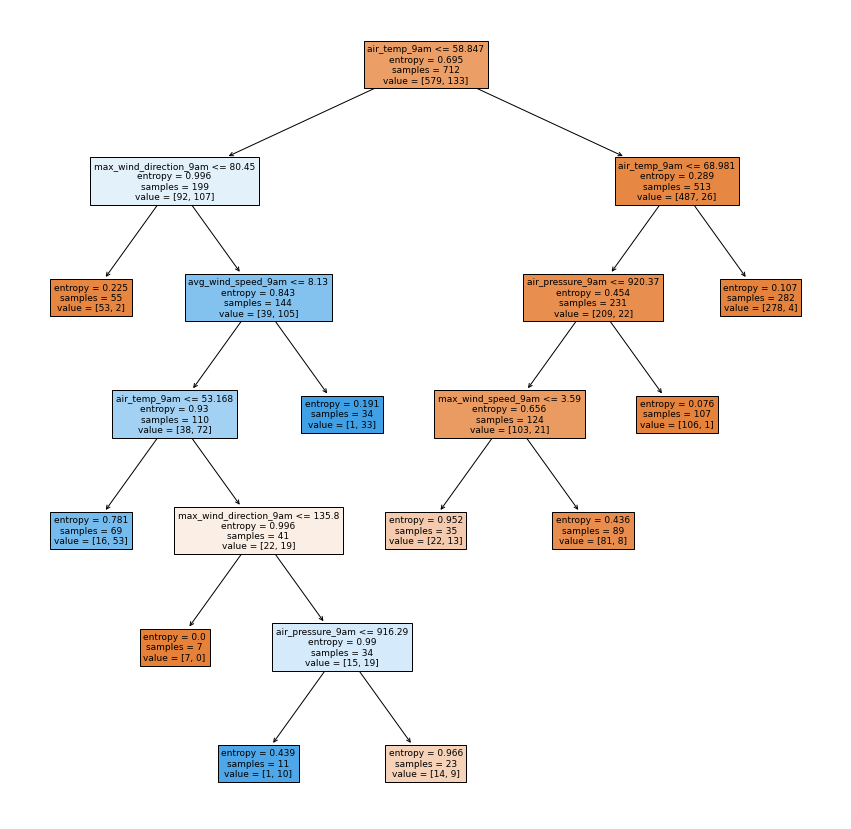

In [51]:
fn=['air_pressure_9am',	'air_temp_9am',	'avg_wind_direction_9am',	'avg_wind_speed_9am',	'max_wind_direction_9am',	'max_wind_speed_9am',	'rain_accumulation_9am',	'rain_duration_9am']
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(humidity_classifier,filled=True,feature_names=fn)

# New Section